In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np
import os
from PIL import Image
import pickle
import random

In [2]:
dir1 = '101_ObjectCategories_32x32'
dir2 = '101_ObjectCategories_32x32_b'
os.makedirs(os.path.join(dir1,'cifar_style_datasets'), exist_ok=True)
os.makedirs(os.path.join(dir2,'cifar_style_datasets'), exist_ok=True)

In [3]:
categories = sorted([x for x in os.listdir(dir1) if len(os.listdir(os.path.join(dir1,x)))>0])
categories_dict = {x:ctr for ctr,x in enumerate(categories)}
inv_categories_dict = {v: k for k, v in categories_dict.items()}
inv_categories_dict
#pickle.dump(inv_categories_dict,open('caltech101_dicts_all.pkl','wb'))

{0: 'BACKGROUND_Google',
 1: 'Faces',
 2: 'Faces_easy',
 3: 'Leopards',
 4: 'Motorbikes',
 5: 'accordion',
 6: 'airplanes',
 7: 'anchor',
 8: 'ant',
 9: 'barrel',
 10: 'bass',
 11: 'beaver',
 12: 'binocular',
 13: 'bonsai',
 14: 'brain',
 15: 'brontosaurus',
 16: 'buddha',
 17: 'butterfly',
 18: 'camera',
 19: 'cannon',
 20: 'car_side',
 21: 'ceiling_fan',
 22: 'cellphone',
 23: 'chair',
 24: 'chandelier',
 25: 'cougar_body',
 26: 'cougar_face',
 27: 'crab',
 28: 'crayfish',
 29: 'crocodile',
 30: 'crocodile_head',
 31: 'cup',
 32: 'dalmatian',
 33: 'dollar_bill',
 34: 'dolphin',
 35: 'dragonfly',
 36: 'electric_guitar',
 37: 'elephant',
 38: 'emu',
 39: 'euphonium',
 40: 'ewer',
 41: 'ferry',
 42: 'flamingo',
 43: 'flamingo_head',
 44: 'garfield',
 45: 'gerenuk',
 46: 'gramophone',
 47: 'grand_piano',
 48: 'hawksbill',
 49: 'headphone',
 50: 'hedgehog',
 51: 'helicopter',
 52: 'ibis',
 53: 'inline_skate',
 54: 'joshua_tree',
 55: 'kangaroo',
 56: 'ketch',
 57: 'lamp',
 58: 'laptop',
 

In [4]:
def get_data_elems(im_root, ims, category, fine_label):

    cl_list = []
    fl_list = []
    fn_list = []
    im_list = []

    for curr_im in ims:
        with Image.open(os.path.join(im_root, category, curr_im)) as z:
            z=z.convert('RGB')
            z=z.resize((32,32),Image.ANTIALIAS)
            zz=np.asarray(z)
            zz=zz.transpose(2,0,1)
            zz=zz.reshape(1,3*32*32)
        
        coarse_label=fine_label
        cl_list.append(coarse_label)
        fl_list.append(fine_label)
        fn_list.append("_".join([category,curr_im]))
        im_list.append(zz)

    if len(im_list) < 1:
        import pdb
        pdb.set_trace()
        temp=0
    im_array = np.concatenate(im_list)
    return [cl_list, fl_list, fn_list,  im_array]


In [5]:
def make_datasets(src_dir):
    #categories = sorted([x for x in os.listdir(dir1) if len(os.listdir(os.path.join(dir1,x)))>0])
    #categories_dict = {x:ctr for ctr,x in enumerate(categories)}
    #inv_categories_dict = {v: k for k, v in categories_dict.items()}

    train_cl_list = []
    train_fl_list = []
    train_fn_list = []
    train_im_list = []

    test_cl_list = []
    test_fl_list = []
    test_fn_list = []
    test_im_list = []

    for curr_cat in categories:
        all_ims = [x for x in os.listdir(os.path.join(dir1,curr_cat)) if x[-4:] == '.jpg']
        num_ims = len(all_ims)
        random.shuffle(all_ims)
        tr_ims = all_ims[0:int(.83*num_ims)]
        te_ims = all_ims[int(.83*num_ims):]

        new_tr_info = get_data_elems(dir1, tr_ims, curr_cat, 
                                     categories_dict[curr_cat])

        train_cl_list += new_tr_info[0]
        train_fl_list += new_tr_info[1]
        train_fn_list += new_tr_info[2]
        train_im_list.append(new_tr_info[3])

        new_te_info = get_data_elems(dir1, te_ims, curr_cat, 
                                     categories_dict[curr_cat])

        test_cl_list += new_te_info[0]
        test_fl_list += new_te_info[1]
        test_fn_list += new_te_info[2]
        test_im_list.append(new_te_info[3])

    train_im_array = np.concatenate(train_im_list)
    test_im_array = np.concatenate(test_im_list)
    
    return [[train_cl_list, train_fl_list, train_fn_list, train_im_array],
            [test_cl_list, test_fl_list, test_fn_list, test_im_array]]

In [6]:
def shuffle_dataset(cl_list, fl_list, fn_list, im_array):

    shuff_array = np.zeros(im_array.shape, dtype=im_array.dtype)
    num_images = im_array.shape[0]
    shuff_list = [x for x in range(num_images)]
    random.shuffle(shuff_list)

    shuff_cl = num_images * [None]
    shuff_fl = num_images * [None]
    shuff_fn = num_images * [None]

    for new, old in enumerate(shuff_list):
        print("Shuffling ",new,"of",len(shuff_list))
        shuff_cl[new] = cl_list[old]
        shuff_fl[new] = fl_list[old]
        shuff_fn[new] = fn_list[old]
        shuff_array[new,:] = im_array[old,:]

    return [shuff_cl, shuff_fl, shuff_fn, shuff_array]

In [7]:
tr1, te1 = make_datasets(dir1)
shtr1 = shuffle_dataset(tr1[0], tr1[1], tr1[2], tr1[3])
shte1 = shuffle_dataset(te1[0], te1[1], te1[2], te1[3])

Shuffling  0 of 7547
Shuffling  1 of 7547
Shuffling  2 of 7547
Shuffling  3 of 7547
Shuffling  4 of 7547
Shuffling  5 of 7547
Shuffling  6 of 7547
Shuffling  7 of 7547
Shuffling  8 of 7547
Shuffling  9 of 7547
Shuffling  10 of 7547
Shuffling  11 of 7547
Shuffling  12 of 7547
Shuffling  13 of 7547
Shuffling  14 of 7547
Shuffling  15 of 7547
Shuffling  16 of 7547
Shuffling  17 of 7547
Shuffling  18 of 7547
Shuffling  19 of 7547
Shuffling  20 of 7547
Shuffling  21 of 7547
Shuffling  22 of 7547
Shuffling  23 of 7547
Shuffling  24 of 7547
Shuffling  25 of 7547
Shuffling  26 of 7547
Shuffling  27 of 7547
Shuffling  28 of 7547
Shuffling  29 of 7547
Shuffling  30 of 7547
Shuffling  31 of 7547
Shuffling  32 of 7547
Shuffling  33 of 7547
Shuffling  34 of 7547
Shuffling  35 of 7547
Shuffling  36 of 7547
Shuffling  37 of 7547
Shuffling  38 of 7547
Shuffling  39 of 7547
Shuffling  40 of 7547
Shuffling  41 of 7547
Shuffling  42 of 7547
Shuffling  43 of 7547
Shuffling  44 of 7547
Shuffling  45 of 754

Shuffling  1076 of 7547
Shuffling  1077 of 7547
Shuffling  1078 of 7547
Shuffling  1079 of 7547
Shuffling  1080 of 7547
Shuffling  1081 of 7547
Shuffling  1082 of 7547
Shuffling  1083 of 7547
Shuffling  1084 of 7547
Shuffling  1085 of 7547
Shuffling  1086 of 7547
Shuffling  1087 of 7547
Shuffling  1088 of 7547
Shuffling  1089 of 7547
Shuffling  1090 of 7547
Shuffling  1091 of 7547
Shuffling  1092 of 7547
Shuffling  1093 of 7547
Shuffling  1094 of 7547
Shuffling  1095 of 7547
Shuffling  1096 of 7547
Shuffling  1097 of 7547
Shuffling  1098 of 7547
Shuffling  1099 of 7547
Shuffling  1100 of 7547
Shuffling  1101 of 7547
Shuffling  1102 of 7547
Shuffling  1103 of 7547
Shuffling  1104 of 7547
Shuffling  1105 of 7547
Shuffling  1106 of 7547
Shuffling  1107 of 7547
Shuffling  1108 of 7547
Shuffling  1109 of 7547
Shuffling  1110 of 7547
Shuffling  1111 of 7547
Shuffling  1112 of 7547
Shuffling  1113 of 7547
Shuffling  1114 of 7547
Shuffling  1115 of 7547
Shuffling  1116 of 7547
Shuffling  1117 

Shuffling  2118 of 7547
Shuffling  2119 of 7547
Shuffling  2120 of 7547
Shuffling  2121 of 7547
Shuffling  2122 of 7547
Shuffling  2123 of 7547
Shuffling  2124 of 7547
Shuffling  2125 of 7547
Shuffling  2126 of 7547
Shuffling  2127 of 7547
Shuffling  2128 of 7547
Shuffling  2129 of 7547
Shuffling  2130 of 7547
Shuffling  2131 of 7547
Shuffling  2132 of 7547
Shuffling  2133 of 7547
Shuffling  2134 of 7547
Shuffling  2135 of 7547
Shuffling  2136 of 7547
Shuffling  2137 of 7547
Shuffling  2138 of 7547
Shuffling  2139 of 7547
Shuffling  2140 of 7547
Shuffling  2141 of 7547
Shuffling  2142 of 7547
Shuffling  2143 of 7547
Shuffling  2144 of 7547
Shuffling  2145 of 7547
Shuffling  2146 of 7547
Shuffling  2147 of 7547
Shuffling  2148 of 7547
Shuffling  2149 of 7547
Shuffling  2150 of 7547
Shuffling  2151 of 7547
Shuffling  2152 of 7547
Shuffling  2153 of 7547
Shuffling  2154 of 7547
Shuffling  2155 of 7547
Shuffling  2156 of 7547
Shuffling  2157 of 7547
Shuffling  2158 of 7547
Shuffling  2159 

Shuffling  3171 of 7547
Shuffling  3172 of 7547
Shuffling  3173 of 7547
Shuffling  3174 of 7547
Shuffling  3175 of 7547
Shuffling  3176 of 7547
Shuffling  3177 of 7547
Shuffling  3178 of 7547
Shuffling  3179 of 7547
Shuffling  3180 of 7547
Shuffling  3181 of 7547
Shuffling  3182 of 7547
Shuffling  3183 of 7547
Shuffling  3184 of 7547
Shuffling  3185 of 7547
Shuffling  3186 of 7547
Shuffling  3187 of 7547
Shuffling  3188 of 7547
Shuffling  3189 of 7547
Shuffling  3190 of 7547
Shuffling  3191 of 7547
Shuffling  3192 of 7547
Shuffling  3193 of 7547
Shuffling  3194 of 7547
Shuffling  3195 of 7547
Shuffling  3196 of 7547
Shuffling  3197 of 7547
Shuffling  3198 of 7547
Shuffling  3199 of 7547
Shuffling  3200 of 7547
Shuffling  3201 of 7547
Shuffling  3202 of 7547
Shuffling  3203 of 7547
Shuffling  3204 of 7547
Shuffling  3205 of 7547
Shuffling  3206 of 7547
Shuffling  3207 of 7547
Shuffling  3208 of 7547
Shuffling  3209 of 7547
Shuffling  3210 of 7547
Shuffling  3211 of 7547
Shuffling  3212 

Shuffling  4219 of 7547
Shuffling  4220 of 7547
Shuffling  4221 of 7547
Shuffling  4222 of 7547
Shuffling  4223 of 7547
Shuffling  4224 of 7547
Shuffling  4225 of 7547
Shuffling  4226 of 7547
Shuffling  4227 of 7547
Shuffling  4228 of 7547
Shuffling  4229 of 7547
Shuffling  4230 of 7547
Shuffling  4231 of 7547
Shuffling  4232 of 7547
Shuffling  4233 of 7547
Shuffling  4234 of 7547
Shuffling  4235 of 7547
Shuffling  4236 of 7547
Shuffling  4237 of 7547
Shuffling  4238 of 7547
Shuffling  4239 of 7547
Shuffling  4240 of 7547
Shuffling  4241 of 7547
Shuffling  4242 of 7547
Shuffling  4243 of 7547
Shuffling  4244 of 7547
Shuffling  4245 of 7547
Shuffling  4246 of 7547
Shuffling  4247 of 7547
Shuffling  4248 of 7547
Shuffling  4249 of 7547
Shuffling  4250 of 7547
Shuffling  4251 of 7547
Shuffling  4252 of 7547
Shuffling  4253 of 7547
Shuffling  4254 of 7547
Shuffling  4255 of 7547
Shuffling  4256 of 7547
Shuffling  4257 of 7547
Shuffling  4258 of 7547
Shuffling  4259 of 7547
Shuffling  4260 

Shuffling  5262 of 7547
Shuffling  5263 of 7547
Shuffling  5264 of 7547
Shuffling  5265 of 7547
Shuffling  5266 of 7547
Shuffling  5267 of 7547
Shuffling  5268 of 7547
Shuffling  5269 of 7547
Shuffling  5270 of 7547
Shuffling  5271 of 7547
Shuffling  5272 of 7547
Shuffling  5273 of 7547
Shuffling  5274 of 7547
Shuffling  5275 of 7547
Shuffling  5276 of 7547
Shuffling  5277 of 7547
Shuffling  5278 of 7547
Shuffling  5279 of 7547
Shuffling  5280 of 7547
Shuffling  5281 of 7547
Shuffling  5282 of 7547
Shuffling  5283 of 7547
Shuffling  5284 of 7547
Shuffling  5285 of 7547
Shuffling  5286 of 7547
Shuffling  5287 of 7547
Shuffling  5288 of 7547
Shuffling  5289 of 7547
Shuffling  5290 of 7547
Shuffling  5291 of 7547
Shuffling  5292 of 7547
Shuffling  5293 of 7547
Shuffling  5294 of 7547
Shuffling  5295 of 7547
Shuffling  5296 of 7547
Shuffling  5297 of 7547
Shuffling  5298 of 7547
Shuffling  5299 of 7547
Shuffling  5300 of 7547
Shuffling  5301 of 7547
Shuffling  5302 of 7547
Shuffling  5303 

Shuffling  6278 of 7547
Shuffling  6279 of 7547
Shuffling  6280 of 7547
Shuffling  6281 of 7547
Shuffling  6282 of 7547
Shuffling  6283 of 7547
Shuffling  6284 of 7547
Shuffling  6285 of 7547
Shuffling  6286 of 7547
Shuffling  6287 of 7547
Shuffling  6288 of 7547
Shuffling  6289 of 7547
Shuffling  6290 of 7547
Shuffling  6291 of 7547
Shuffling  6292 of 7547
Shuffling  6293 of 7547
Shuffling  6294 of 7547
Shuffling  6295 of 7547
Shuffling  6296 of 7547
Shuffling  6297 of 7547
Shuffling  6298 of 7547
Shuffling  6299 of 7547
Shuffling  6300 of 7547
Shuffling  6301 of 7547
Shuffling  6302 of 7547
Shuffling  6303 of 7547
Shuffling  6304 of 7547
Shuffling  6305 of 7547
Shuffling  6306 of 7547
Shuffling  6307 of 7547
Shuffling  6308 of 7547
Shuffling  6309 of 7547
Shuffling  6310 of 7547
Shuffling  6311 of 7547
Shuffling  6312 of 7547
Shuffling  6313 of 7547
Shuffling  6314 of 7547
Shuffling  6315 of 7547
Shuffling  6316 of 7547
Shuffling  6317 of 7547
Shuffling  6318 of 7547
Shuffling  6319 

Shuffling  7310 of 7547
Shuffling  7311 of 7547
Shuffling  7312 of 7547
Shuffling  7313 of 7547
Shuffling  7314 of 7547
Shuffling  7315 of 7547
Shuffling  7316 of 7547
Shuffling  7317 of 7547
Shuffling  7318 of 7547
Shuffling  7319 of 7547
Shuffling  7320 of 7547
Shuffling  7321 of 7547
Shuffling  7322 of 7547
Shuffling  7323 of 7547
Shuffling  7324 of 7547
Shuffling  7325 of 7547
Shuffling  7326 of 7547
Shuffling  7327 of 7547
Shuffling  7328 of 7547
Shuffling  7329 of 7547
Shuffling  7330 of 7547
Shuffling  7331 of 7547
Shuffling  7332 of 7547
Shuffling  7333 of 7547
Shuffling  7334 of 7547
Shuffling  7335 of 7547
Shuffling  7336 of 7547
Shuffling  7337 of 7547
Shuffling  7338 of 7547
Shuffling  7339 of 7547
Shuffling  7340 of 7547
Shuffling  7341 of 7547
Shuffling  7342 of 7547
Shuffling  7343 of 7547
Shuffling  7344 of 7547
Shuffling  7345 of 7547
Shuffling  7346 of 7547
Shuffling  7347 of 7547
Shuffling  7348 of 7547
Shuffling  7349 of 7547
Shuffling  7350 of 7547
Shuffling  7351 

Shuffling  811 of 1597
Shuffling  812 of 1597
Shuffling  813 of 1597
Shuffling  814 of 1597
Shuffling  815 of 1597
Shuffling  816 of 1597
Shuffling  817 of 1597
Shuffling  818 of 1597
Shuffling  819 of 1597
Shuffling  820 of 1597
Shuffling  821 of 1597
Shuffling  822 of 1597
Shuffling  823 of 1597
Shuffling  824 of 1597
Shuffling  825 of 1597
Shuffling  826 of 1597
Shuffling  827 of 1597
Shuffling  828 of 1597
Shuffling  829 of 1597
Shuffling  830 of 1597
Shuffling  831 of 1597
Shuffling  832 of 1597
Shuffling  833 of 1597
Shuffling  834 of 1597
Shuffling  835 of 1597
Shuffling  836 of 1597
Shuffling  837 of 1597
Shuffling  838 of 1597
Shuffling  839 of 1597
Shuffling  840 of 1597
Shuffling  841 of 1597
Shuffling  842 of 1597
Shuffling  843 of 1597
Shuffling  844 of 1597
Shuffling  845 of 1597
Shuffling  846 of 1597
Shuffling  847 of 1597
Shuffling  848 of 1597
Shuffling  849 of 1597
Shuffling  850 of 1597
Shuffling  851 of 1597
Shuffling  852 of 1597
Shuffling  853 of 1597
Shuffling  

In [8]:
def show_image(samp, data_dict):
    test_im = data_dict[3][samp]
    zz=test_im.reshape(1,3,32,32)
    zz=zz[0,:]
    zz=zz.transpose(1,2,0)
    im_name = inv_categories_dict[data_dict[1][samp]]
    file_name = data_dict[2][samp]
    print(im_name, file_name)
    imshow(zz)
    

cougar_face cougar_face_image_0031.jpg


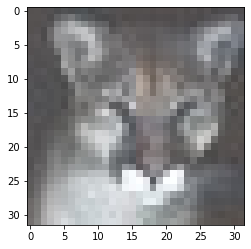

In [9]:
show_image(5500, shtr1)

In [10]:
shtr_dict = {'coarse_labels': shtr1[0], 'fine_labels':shtr1[1], 
             'filenames':shtr1[2],'data':shtr1[3], 'batch_label':"N/A"}
shte_dict = {'coarse_labels': shte1[0], 'fine_labels':shte1[1], 
             'filenames':shte1[2],'data':shte1[3], 'batch_label':"N/A"}

meta_list = [inv_categories_dict[x] for x in inv_categories_dict]
meta_dict = {'coarse_label_names':meta_list, 'fine_label_names':meta_list}

In [11]:
import pickle
pickle.dump(shtr_dict,open("train","wb"))
pickle.dump(shte_dict,open("test","wb"))
pickle.dump(meta_dict,open("meta","wb"))
os.getcwd()

'/home/smgutstein/Data'

In [12]:
pickle.dump(categories_dict, 
            open('/home/smgutstein/Projects/opt-tfer-2/dataset_info/caltech101_dicts_all.pkl','wb'))

In [13]:
liv=['sunflower', 'scorpion', 'dolphin', 'stegosaurus', 'hawksbill',
        'water_lilly', 'dragonfly', 'crayfish', 'Leopards', 'cannon',
        'flamingo_head', 'tick', 'Faces', 'cougar_body', 'flamingo',
        'crocodile', 'bonsai', 'gerenuk', 'emu', 'panda', 'ant',
        'butterfly', 'ibis', 'hedgehog', 'pigeon', 'beaver',
        'platypus', 'lotus', 'wild_cat', 'crab', 'strawberry',
        'rooster', 'sea_horse', 'llama', 'trilobite', 'brontosaurus',
        'nautilus', 'rhino', 'mayfly', 'airplanes', 'lobster',
        'okapi', 'dalmatian', 'crocodile_head', 'bass', 'joshua_tree',
        'kangaroo', 'cougar_face', 'octopus', 'elephant', 'starfish']

In [14]:
nl=['Motorbikes', 'accordion', 'anchor', 'barrel', 'binocular',
        'brain', 'buddha', 'camera', 'car_side', 'ceiling_fan',
        'cellphone', 'chair', 'chandelier', 'cup', 'dollar_bill',
        'electric_guitar', 'euphonium', 'ewer', 'ferry', 'garfield',
        'gramophone', 'grand_piano', 'headphone', 'helicopter', 'inline_skate',
        'ketch', 'lamp', 'laptop', 'mandolin', 'menorah', 
        'metronome', 'minaret', 'pagoda', 'pizza', 'pyramid',
        'revolver', 'saxophone', 'schooner', 'scissors', 'snoopy',
        'soccer_ball', 'stapler', 'stop_sign', 'umbrella', 'watch',
        'wheelchair', 'windsor_chair', 'wrench', 'yin_yang']

In [15]:
def make_subset_datasets(src_dir, categories):
    #categories_dict = {x:ctr for ctr,x in enumerate(categories)}
    #inv_categories_dict = {v: k for k, v in categories_dict.items()}

    train_cl_list = []
    train_fl_list = []
    train_fn_list = []
    train_im_list = []

    test_cl_list = []
    test_fl_list = []
    test_fn_list = []
    test_im_list = []

    for curr_cat in categories:
        all_ims = [x for x in os.listdir(os.path.join(dir1,curr_cat)) if x[-4:] == '.jpg']
        num_ims = len(all_ims)
        random.shuffle(all_ims)
        #print(curr_cat,num_ims)
        tr_ims = all_ims[0:int(.83*num_ims)]
        te_ims = all_ims[int(.83*num_ims):]

        new_tr_info = get_data_elems(dir1, tr_ims, curr_cat, 
                                     categories_dict[curr_cat])

        train_cl_list += new_tr_info[0]
        train_fl_list += new_tr_info[1]
        train_fn_list += new_tr_info[2]
        train_im_list.append(new_tr_info[3])

        new_te_info = get_data_elems(dir1, te_ims, curr_cat, 
                                     categories_dict[curr_cat])

        test_cl_list += new_te_info[0]
        test_fl_list += new_te_info[1]
        test_fn_list += new_te_info[2]
        test_im_list.append(new_te_info[3])

    train_im_array = np.concatenate(train_im_list)
    test_im_array = np.concatenate(test_im_list)
    
    return [[train_cl_list, train_fl_list, train_fn_list, train_im_array],
            [test_cl_list, test_fl_list, test_fn_list, test_im_array]]

In [16]:
liv_tr, liv_te = make_subset_datasets(dir1,liv)

In [17]:
liv_shtr = shuffle_dataset(liv_tr[0], liv_tr[1], liv_tr[2], liv_tr[3])
liv_shte = shuffle_dataset(liv_te[0], liv_te[1], liv_te[2], liv_te[3])

liv_shtr_dict = {'coarse_labels': liv_shtr[0], 'fine_labels':liv_shtr[1], 
             'filenames':liv_shtr[2],'data':liv_shtr[3], 
             'batch_label':"N/A"}
liv_shte_dict = {'coarse_labels': liv_shte[0], 'fine_labels':liv_shte[1], 
             'filenames':liv_shte[2],'data':liv_shte[3], 
             'batch_label':"N/A"}
meta_dict = {'coarse_label_names':liv, 'fine_label_names':liv}
pickle.dump(liv_shtr_dict,open("train","wb"))
pickle.dump(liv_shte_dict,open("test","wb"))
pickle.dump(meta_dict,open("meta","wb"))

Shuffling  0 of 3530
Shuffling  1 of 3530
Shuffling  2 of 3530
Shuffling  3 of 3530
Shuffling  4 of 3530
Shuffling  5 of 3530
Shuffling  6 of 3530
Shuffling  7 of 3530
Shuffling  8 of 3530
Shuffling  9 of 3530
Shuffling  10 of 3530
Shuffling  11 of 3530
Shuffling  12 of 3530
Shuffling  13 of 3530
Shuffling  14 of 3530
Shuffling  15 of 3530
Shuffling  16 of 3530
Shuffling  17 of 3530
Shuffling  18 of 3530
Shuffling  19 of 3530
Shuffling  20 of 3530
Shuffling  21 of 3530
Shuffling  22 of 3530
Shuffling  23 of 3530
Shuffling  24 of 3530
Shuffling  25 of 3530
Shuffling  26 of 3530
Shuffling  27 of 3530
Shuffling  28 of 3530
Shuffling  29 of 3530
Shuffling  30 of 3530
Shuffling  31 of 3530
Shuffling  32 of 3530
Shuffling  33 of 3530
Shuffling  34 of 3530
Shuffling  35 of 3530
Shuffling  36 of 3530
Shuffling  37 of 3530
Shuffling  38 of 3530
Shuffling  39 of 3530
Shuffling  40 of 3530
Shuffling  41 of 3530
Shuffling  42 of 3530
Shuffling  43 of 3530
Shuffling  44 of 3530
Shuffling  45 of 353

Shuffling  1025 of 3530
Shuffling  1026 of 3530
Shuffling  1027 of 3530
Shuffling  1028 of 3530
Shuffling  1029 of 3530
Shuffling  1030 of 3530
Shuffling  1031 of 3530
Shuffling  1032 of 3530
Shuffling  1033 of 3530
Shuffling  1034 of 3530
Shuffling  1035 of 3530
Shuffling  1036 of 3530
Shuffling  1037 of 3530
Shuffling  1038 of 3530
Shuffling  1039 of 3530
Shuffling  1040 of 3530
Shuffling  1041 of 3530
Shuffling  1042 of 3530
Shuffling  1043 of 3530
Shuffling  1044 of 3530
Shuffling  1045 of 3530
Shuffling  1046 of 3530
Shuffling  1047 of 3530
Shuffling  1048 of 3530
Shuffling  1049 of 3530
Shuffling  1050 of 3530
Shuffling  1051 of 3530
Shuffling  1052 of 3530
Shuffling  1053 of 3530
Shuffling  1054 of 3530
Shuffling  1055 of 3530
Shuffling  1056 of 3530
Shuffling  1057 of 3530
Shuffling  1058 of 3530
Shuffling  1059 of 3530
Shuffling  1060 of 3530
Shuffling  1061 of 3530
Shuffling  1062 of 3530
Shuffling  1063 of 3530
Shuffling  1064 of 3530
Shuffling  1065 of 3530
Shuffling  1066 

Shuffling  2077 of 3530
Shuffling  2078 of 3530
Shuffling  2079 of 3530
Shuffling  2080 of 3530
Shuffling  2081 of 3530
Shuffling  2082 of 3530
Shuffling  2083 of 3530
Shuffling  2084 of 3530
Shuffling  2085 of 3530
Shuffling  2086 of 3530
Shuffling  2087 of 3530
Shuffling  2088 of 3530
Shuffling  2089 of 3530
Shuffling  2090 of 3530
Shuffling  2091 of 3530
Shuffling  2092 of 3530
Shuffling  2093 of 3530
Shuffling  2094 of 3530
Shuffling  2095 of 3530
Shuffling  2096 of 3530
Shuffling  2097 of 3530
Shuffling  2098 of 3530
Shuffling  2099 of 3530
Shuffling  2100 of 3530
Shuffling  2101 of 3530
Shuffling  2102 of 3530
Shuffling  2103 of 3530
Shuffling  2104 of 3530
Shuffling  2105 of 3530
Shuffling  2106 of 3530
Shuffling  2107 of 3530
Shuffling  2108 of 3530
Shuffling  2109 of 3530
Shuffling  2110 of 3530
Shuffling  2111 of 3530
Shuffling  2112 of 3530
Shuffling  2113 of 3530
Shuffling  2114 of 3530
Shuffling  2115 of 3530
Shuffling  2116 of 3530
Shuffling  2117 of 3530
Shuffling  2118 

Shuffling  3136 of 3530
Shuffling  3137 of 3530
Shuffling  3138 of 3530
Shuffling  3139 of 3530
Shuffling  3140 of 3530
Shuffling  3141 of 3530
Shuffling  3142 of 3530
Shuffling  3143 of 3530
Shuffling  3144 of 3530
Shuffling  3145 of 3530
Shuffling  3146 of 3530
Shuffling  3147 of 3530
Shuffling  3148 of 3530
Shuffling  3149 of 3530
Shuffling  3150 of 3530
Shuffling  3151 of 3530
Shuffling  3152 of 3530
Shuffling  3153 of 3530
Shuffling  3154 of 3530
Shuffling  3155 of 3530
Shuffling  3156 of 3530
Shuffling  3157 of 3530
Shuffling  3158 of 3530
Shuffling  3159 of 3530
Shuffling  3160 of 3530
Shuffling  3161 of 3530
Shuffling  3162 of 3530
Shuffling  3163 of 3530
Shuffling  3164 of 3530
Shuffling  3165 of 3530
Shuffling  3166 of 3530
Shuffling  3167 of 3530
Shuffling  3168 of 3530
Shuffling  3169 of 3530
Shuffling  3170 of 3530
Shuffling  3171 of 3530
Shuffling  3172 of 3530
Shuffling  3173 of 3530
Shuffling  3174 of 3530
Shuffling  3175 of 3530
Shuffling  3176 of 3530
Shuffling  3177 

Shuffling  680 of 750
Shuffling  681 of 750
Shuffling  682 of 750
Shuffling  683 of 750
Shuffling  684 of 750
Shuffling  685 of 750
Shuffling  686 of 750
Shuffling  687 of 750
Shuffling  688 of 750
Shuffling  689 of 750
Shuffling  690 of 750
Shuffling  691 of 750
Shuffling  692 of 750
Shuffling  693 of 750
Shuffling  694 of 750
Shuffling  695 of 750
Shuffling  696 of 750
Shuffling  697 of 750
Shuffling  698 of 750
Shuffling  699 of 750
Shuffling  700 of 750
Shuffling  701 of 750
Shuffling  702 of 750
Shuffling  703 of 750
Shuffling  704 of 750
Shuffling  705 of 750
Shuffling  706 of 750
Shuffling  707 of 750
Shuffling  708 of 750
Shuffling  709 of 750
Shuffling  710 of 750
Shuffling  711 of 750
Shuffling  712 of 750
Shuffling  713 of 750
Shuffling  714 of 750
Shuffling  715 of 750
Shuffling  716 of 750
Shuffling  717 of 750
Shuffling  718 of 750
Shuffling  719 of 750
Shuffling  720 of 750
Shuffling  721 of 750
Shuffling  722 of 750
Shuffling  723 of 750
Shuffling  724 of 750
Shuffling 

In [18]:
max(liv_shte_dict['fine_labels'])

98

In [19]:
nliv_tr, nliv_te = make_subset_datasets(dir1,nl)

In [20]:
nliv_shtr = shuffle_dataset(nliv_tr[0], nliv_tr[1], nliv_tr[2], nliv_tr[3])
nliv_shte = shuffle_dataset(nliv_te[0], nliv_te[1], nliv_te[2], nliv_te[3])
meta_dict = {'coarse_label_names':nl, 'fine_label_names':nl}

nliv_shtr_dict = {'coarse_labels': nliv_shtr[0], 'fine_labels':nliv_shtr[1], 
             'filenames':nliv_shtr[2],'data':nliv_shtr[3], 
             'batch_label':"N/A"}
nliv_shte_dict = {'coarse_labels': nliv_shte[0], 'fine_labels':nliv_shte[1], 
             'filenames':nliv_shte[2],'data':nliv_shte[3], 
             'batch_label':"N/A"}
meta_dict = {'coarse_label_names':nl, 'fine_label_names':nl}
pickle.dump(nliv_shtr_dict,open("train","wb"))
pickle.dump(nliv_shte_dict,open("test","wb"))
pickle.dump(meta_dict,open("meta","wb"))

Shuffling  0 of 3269
Shuffling  1 of 3269
Shuffling  2 of 3269
Shuffling  3 of 3269
Shuffling  4 of 3269
Shuffling  5 of 3269
Shuffling  6 of 3269
Shuffling  7 of 3269
Shuffling  8 of 3269
Shuffling  9 of 3269
Shuffling  10 of 3269
Shuffling  11 of 3269
Shuffling  12 of 3269
Shuffling  13 of 3269
Shuffling  14 of 3269
Shuffling  15 of 3269
Shuffling  16 of 3269
Shuffling  17 of 3269
Shuffling  18 of 3269
Shuffling  19 of 3269
Shuffling  20 of 3269
Shuffling  21 of 3269
Shuffling  22 of 3269
Shuffling  23 of 3269
Shuffling  24 of 3269
Shuffling  25 of 3269
Shuffling  26 of 3269
Shuffling  27 of 3269
Shuffling  28 of 3269
Shuffling  29 of 3269
Shuffling  30 of 3269
Shuffling  31 of 3269
Shuffling  32 of 3269
Shuffling  33 of 3269
Shuffling  34 of 3269
Shuffling  35 of 3269
Shuffling  36 of 3269
Shuffling  37 of 3269
Shuffling  38 of 3269
Shuffling  39 of 3269
Shuffling  40 of 3269
Shuffling  41 of 3269
Shuffling  42 of 3269
Shuffling  43 of 3269
Shuffling  44 of 3269
Shuffling  45 of 326

Shuffling  1074 of 3269
Shuffling  1075 of 3269
Shuffling  1076 of 3269
Shuffling  1077 of 3269
Shuffling  1078 of 3269
Shuffling  1079 of 3269
Shuffling  1080 of 3269
Shuffling  1081 of 3269
Shuffling  1082 of 3269
Shuffling  1083 of 3269
Shuffling  1084 of 3269
Shuffling  1085 of 3269
Shuffling  1086 of 3269
Shuffling  1087 of 3269
Shuffling  1088 of 3269
Shuffling  1089 of 3269
Shuffling  1090 of 3269
Shuffling  1091 of 3269
Shuffling  1092 of 3269
Shuffling  1093 of 3269
Shuffling  1094 of 3269
Shuffling  1095 of 3269
Shuffling  1096 of 3269
Shuffling  1097 of 3269
Shuffling  1098 of 3269
Shuffling  1099 of 3269
Shuffling  1100 of 3269
Shuffling  1101 of 3269
Shuffling  1102 of 3269
Shuffling  1103 of 3269
Shuffling  1104 of 3269
Shuffling  1105 of 3269
Shuffling  1106 of 3269
Shuffling  1107 of 3269
Shuffling  1108 of 3269
Shuffling  1109 of 3269
Shuffling  1110 of 3269
Shuffling  1111 of 3269
Shuffling  1112 of 3269
Shuffling  1113 of 3269
Shuffling  1114 of 3269
Shuffling  1115 

Shuffling  2148 of 3269
Shuffling  2149 of 3269
Shuffling  2150 of 3269
Shuffling  2151 of 3269
Shuffling  2152 of 3269
Shuffling  2153 of 3269
Shuffling  2154 of 3269
Shuffling  2155 of 3269
Shuffling  2156 of 3269
Shuffling  2157 of 3269
Shuffling  2158 of 3269
Shuffling  2159 of 3269
Shuffling  2160 of 3269
Shuffling  2161 of 3269
Shuffling  2162 of 3269
Shuffling  2163 of 3269
Shuffling  2164 of 3269
Shuffling  2165 of 3269
Shuffling  2166 of 3269
Shuffling  2167 of 3269
Shuffling  2168 of 3269
Shuffling  2169 of 3269
Shuffling  2170 of 3269
Shuffling  2171 of 3269
Shuffling  2172 of 3269
Shuffling  2173 of 3269
Shuffling  2174 of 3269
Shuffling  2175 of 3269
Shuffling  2176 of 3269
Shuffling  2177 of 3269
Shuffling  2178 of 3269
Shuffling  2179 of 3269
Shuffling  2180 of 3269
Shuffling  2181 of 3269
Shuffling  2182 of 3269
Shuffling  2183 of 3269
Shuffling  2184 of 3269
Shuffling  2185 of 3269
Shuffling  2186 of 3269
Shuffling  2187 of 3269
Shuffling  2188 of 3269
Shuffling  2189 

Shuffling  3215 of 3269
Shuffling  3216 of 3269
Shuffling  3217 of 3269
Shuffling  3218 of 3269
Shuffling  3219 of 3269
Shuffling  3220 of 3269
Shuffling  3221 of 3269
Shuffling  3222 of 3269
Shuffling  3223 of 3269
Shuffling  3224 of 3269
Shuffling  3225 of 3269
Shuffling  3226 of 3269
Shuffling  3227 of 3269
Shuffling  3228 of 3269
Shuffling  3229 of 3269
Shuffling  3230 of 3269
Shuffling  3231 of 3269
Shuffling  3232 of 3269
Shuffling  3233 of 3269
Shuffling  3234 of 3269
Shuffling  3235 of 3269
Shuffling  3236 of 3269
Shuffling  3237 of 3269
Shuffling  3238 of 3269
Shuffling  3239 of 3269
Shuffling  3240 of 3269
Shuffling  3241 of 3269
Shuffling  3242 of 3269
Shuffling  3243 of 3269
Shuffling  3244 of 3269
Shuffling  3245 of 3269
Shuffling  3246 of 3269
Shuffling  3247 of 3269
Shuffling  3248 of 3269
Shuffling  3249 of 3269
Shuffling  3250 of 3269
Shuffling  3251 of 3269
Shuffling  3252 of 3269
Shuffling  3253 of 3269
Shuffling  3254 of 3269
Shuffling  3255 of 3269
Shuffling  3256 

In [21]:
3269+3530+750+693, 7547+1597-8242

(8242, 902)

In [ ]:
len(liv),len(nl)

In [ ]:
len(os.listdir('./101_ObjectCategories'))

In [ ]:
meta_list

In [ ]:
inv_categories_dict